# Необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [2]:
lectures = pd.read_csv('data/lectures.csv')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [65]:
questions = pd.read_csv('data/questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [66]:
train = pd.read_csv('data/train.csv')
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


# Анализ

In [68]:
# переведем время в минуты для удобства
train['timestamp'] = train['timestamp']/60000
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time']/60000

In [69]:
# Фильтруем только вопросы в train.csv (content_type_id == 0)
train_questions = train[train['content_type_id'] == 0].copy()

# Объединение train_questions с метаданными из questions.csv
train_questions = train_questions.merge(questions, how='left', left_on='content_id', right_on='question_id')

# избавимся от столбцов, не несущих полезной информации:
# 'row_id' - просто номер строки, он не нужен
# 'content_type_id' - тип контента, по данному столбцу мы уже разделили данные
# 'user_answer' и 'answered_correctly' - эти столбцы совместно дублируют информацию из столбца answered_correctly
train_questions = train_questions.drop(columns=['row_id', 'content_type_id',  'user_answer', 'correct_answer', 'question_id'])

# Аналогично для лекций
train_lectures = train[train['content_type_id'] == 1].copy()
train_lectures = train_lectures.merge(lectures, how='left', left_on='content_id', right_on='lecture_id')
# избавимся от столбцов, не несущих полезной информации:
# 'row_id' - просто номер строки, он не нужен
# 'content_type_id' - тип контента, по данному столбцу мы уже разделили данные
# 'user_answer' и 'answered_correctly' - эти столбцы совместно дублируют информацию из столбца answered_correctly
# 'prior_question_elapsed_time' - характеристика для вопросов
# 'prior_question_had_explanation' - характеристика для вопросов
train_lectures = train_lectures.drop(columns=['row_id', 'content_type_id', 'user_answer', 'prior_question_elapsed_time',
                                              'prior_question_had_explanation', 'answered_correctly', 'lecture_id'])
# train_lectures = pd.get_dummies(train_lectures['category'], prefix='category')


In [70]:
display(train_questions)
display(train_lectures)


,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part,tags
0,0.000000,115,5692,1,1,NaN,NaN,5692,5,151
1,0.949050,115,5716,2,1,0.616667,False,5716,5,168
2,1.972717,115,128,0,1,0.916667,False,128,1,131 149 92
3,2.186117,115,7860,3,1,0.316667,False,7860,1,131 104 81
4,2.299417,115,7922,4,1,0.183333,False,7922,1,131 149 92
...,...,...,...,...,...,...,...,...,...,...
99271295,7142.740333,2147482888,3586,22,1,0.300000,True,3586,5,8
99271296,7143.083333,2147482888,6341,23,1,0.233333,True,6341,5,60
99271297,7143.557917,2147482888,4212,24,1,0.233333,True,4212,5,95
99271298,7144.156767,2147482888,6343,25,0,0.366667,True,6343,5,60


,timestamp,user_id,content_id,task_container_id,tag,part,type_of
0,10.896033,2746,6808,14,129,2,intention
1,169.730783,5382,16736,21,40,1,concept
2,23739.143283,5382,30207,104,43,5,concept
3,23759.296283,5382,18545,121,58,5,concept
4,6763.550483,8623,10540,59,99,1,concept
...,...,...,...,...,...,...,...
1959027,2202.630967,2147482216,14325,38,69,2,intention
1959028,17893.224300,2147482216,21887,170,119,2,concept
1959029,20671.937600,2147482216,6808,193,129,2,intention
1959030,20674.510267,2147482216,27699,195,129,2,intention


In [71]:
# Правильность ответов на конкретные вопросы (что-то вроде сложности вопроса) и количество попыток дать ответ (все - правильные и не правильные)

question_stats = train_questions.groupby('content_id').agg({
    'answered_correctly': ['mean', 'count']
}).reset_index()

question_stats.columns = ['content_id', 'answered_correctly_mean', 'attempts']
question_stats

,content_id,answered_correctly_mean,attempts
0,0,0.907721,6903
1,1,0.890646,7398
2,2,0.554281,44905
3,3,0.779437,22973
4,4,0.613215,31736
...,...,...,...
13518,13518,0.786866,868
13519,13519,0.571429,924
13520,13520,0.672474,861
13521,13521,0.808046,870


In [78]:
# Правильность ответов на одну "тему" и количество попыток ответить всего

question_stats_1 = train_questions.groupby('task_container_id').agg({
    'answered_correctly': ['mean', 'count']
}).reset_index()

question_stats_1.columns = ['task_container_id', 'task_container_mean', 'task_containerattempts']
display(question_stats_1)
display(question_stats_1.describe())

,task_container_id,task_container_mean,task_containerattempts
0,0,0.680027,395915
1,1,0.527191,395879
2,2,0.435713,395540
3,3,0.543192,395295
4,4,0.476968,692036
...,...,...,...
9995,9995,0.763158,190
9996,9996,0.769231,182
9997,9997,0.756757,185
9998,9998,0.786885,183


,task_container_id,task_container_mean,task_containerattempts
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,0.713445,9927.130000
std,2886.89568,0.028725,32457.455136
min,0.00000,0.314547,169.000000
25%,2499.75000,0.695377,419.750000
50%,4999.50000,0.710280,1308.500000
75%,7499.25000,0.729401,5706.750000
max,9999.00000,0.837838,801910.000000


<ipython-input-73-7f7384936a33>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_stats['lectures_watched'].fillna(0, inplace=True)


,user_id,user_mean,user_attempts,prior_question_had_explanation,lectures_watched
0,115,0.695652,46,False,0.0
1,124,0.233333,30,False,0.0
2,2746,0.578947,19,False,1.0
3,5382,0.672000,125,False,3.0
4,8623,0.642202,109,False,3.0
...,...,...,...,...,...
393651,2147470770,0.765487,226,False,2.0
393652,2147470777,0.691489,752,False,6.0
393653,2147481750,0.760000,50,False,0.0
393654,2147482216,0.643636,275,False,5.0


<ipython-input-73-7f7384936a33>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_stats['prior_question_had_explanation'].fillna(False, inplace=True)
<ipython-input-73-7f7384936a33>:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_stats['prior_question_had_explanation'].fillna(False, inplace=

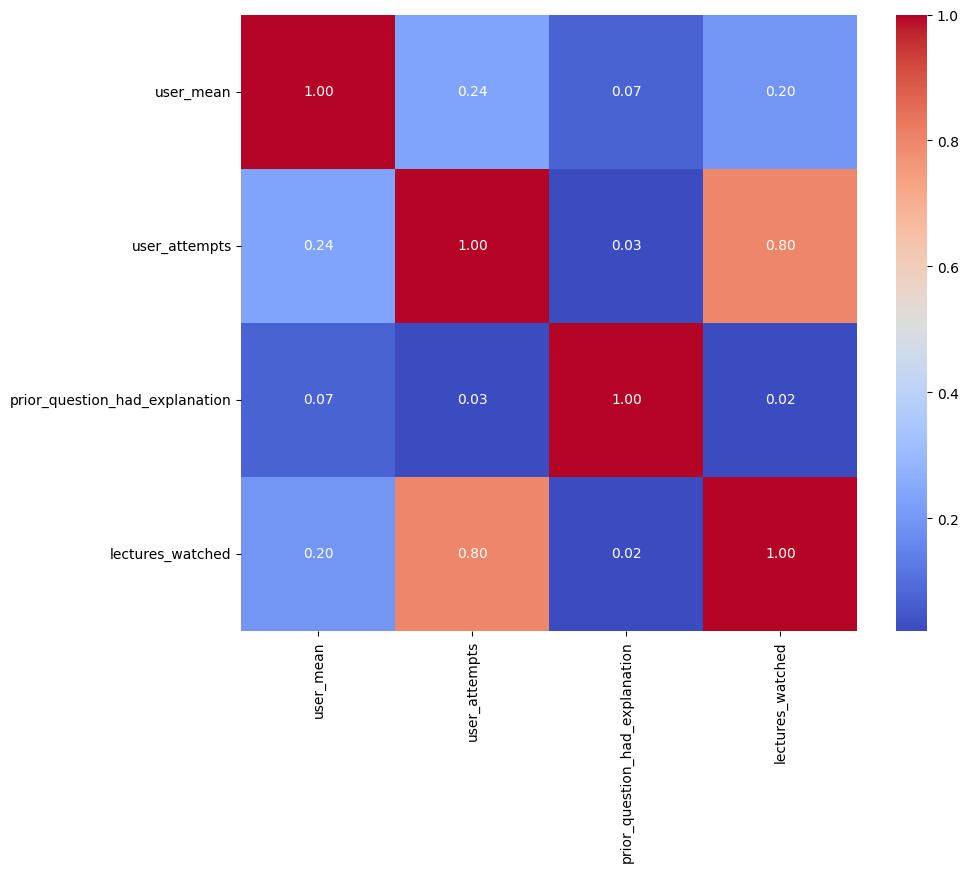

In [73]:
# Правильность ответов конкретного юзера, всего попыток ответов на вопросы,
# давали ли ему ответы на предыдущие вопросы, кол-во просмотренных лекций

question_stats_2 = train_questions.groupby('user_id').agg({
    'answered_correctly': ['mean', 'count'],
    'prior_question_had_explanation': 'first'
}).reset_index()

question_stats_2.columns = ['user_id', 'user_mean', 'user_attempts', 'prior_question_had_explanation']


# Добавим информацию о просмотре юзером лекции
lecture_stats = train_lectures.groupby('user_id').agg({
    'content_id': 'count'
}).reset_index()
lecture_stats.columns = ['user_id', 'lectures_watched']

combined_stats = question_stats_2.merge(lecture_stats, on='user_id', how='left')
combined_stats['lectures_watched'].fillna(0, inplace=True)
display(combined_stats)

# Расмотрим зависимость характеристик для данной таблицы
combined_stats['prior_question_had_explanation'].fillna(False, inplace=True)
combined_stats['prior_question_had_explanation'] = combined_stats['prior_question_had_explanation'].astype(int)
combined_stats.set_index('user_id', inplace=True)
corr = combined_stats.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

display(combined_stats.describe())

In [79]:
# Рассмотрим, как усвоились части материала

part_effect = train_questions.groupby('part').agg({
    'answered_correctly': 'mean'
}).reset_index()
part_effect.columns = ['part', 'avg_correct_by_part']
display(part_effect)
display(combined_stats.describe())

,part,avg_correct_by_part
0,1,0.745032
1,2,0.708694
2,3,0.701456
3,4,0.630998
4,5,0.610088
5,6,0.669388
6,7,0.659601


,user_mean,user_attempts,prior_question_had_explanation,lectures_watched
count,393656.000000,393656.000000,393656.000000,393656.000000
mean,0.545183,252.177790,0.016164,4.976507
std,0.163378,734.721108,0.126106,15.964786
min,0.000000,1.000000,0.000000,0.000000
25%,0.433333,30.000000,0.000000,0.000000
50%,0.571429,40.000000,0.000000,0.000000
75%,0.666667,154.000000,0.000000,2.000000
max,1.000000,17609.000000,1.000000,397.000000


,user_id,content_id,answered_correctly,prior_question_elapsed_time
0,115,5692,1,NaN
1,115,5716,1,0.616667
2,115,128,1,0.916667
3,115,7860,1,0.316667
4,115,7922,1,0.183333
...,...,...,...,...
99271295,2147482888,3586,1,0.300000
99271296,2147482888,6341,1,0.233333
99271297,2147482888,4212,1,0.233333
99271298,2147482888,6343,0,0.366667


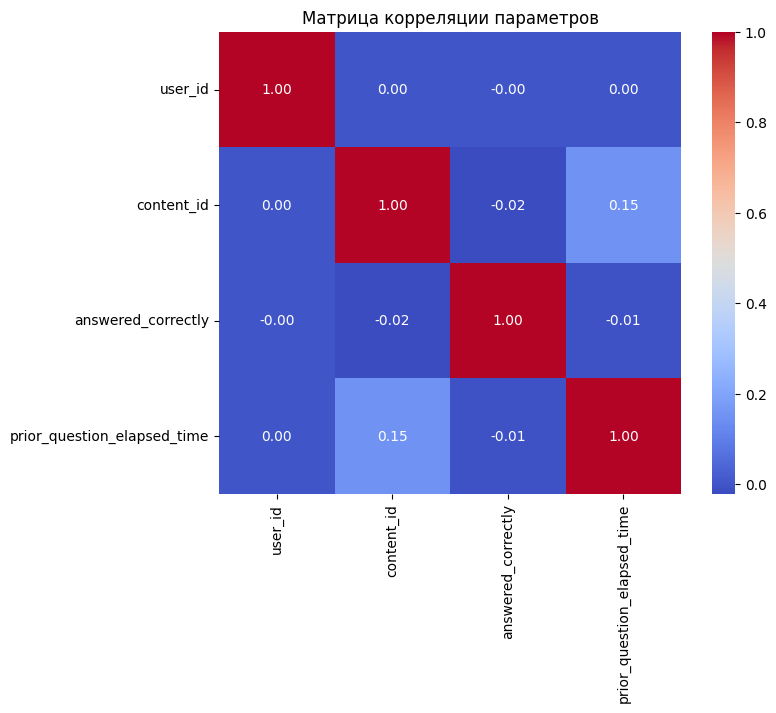

,user_id,content_id,answered_correctly,prior_question_elapsed_time
count,9.927130e+07,9.927130e+07,9.927130e+07,9.887879e+07
mean,1.076745e+09,4.994398e+03,6.572355e-01,4.237302e-01
std,6.196995e+08,3.288955e+03,4.746335e-01,3.324691e-01
min,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.408370e+08,2.016000e+03,0.000000e+00,2.666667e-01
50%,1.071807e+09,4.984000e+03,1.000000e+00,3.500000e-01
75%,1.615742e+09,7.218000e+03,1.000000e+00,4.944333e-01
max,2.147483e+09,1.352200e+04,1.000000e+00,5.000000e+00


In [80]:
# Также полезно будет изучить время, потраченное юзером на ответ на вопрос

time_df = train_questions.loc[:, ['user_id', 'content_id', 'answered_correctly', 'prior_question_elapsed_time']].copy()
display(time_df)

# Расчет матрицы корреляции
correlation_matrix = time_df.corr()

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляции параметров')
plt.show()

display(time_df.describe())